In [2]:
import re
from textblob import TextBlob
import numpy as np
from textblob import Word
from textblob.classifiers import NaiveBayesClassifier
import nltk
from nltk.probability import FreqDist
import random
import numpy as np
from textblob import TextBlob

## Reading the  processed and projected data obtaned in the previous notebook

In [4]:
with open("processed_file.txt", "r") as fh:
    data = fh.read().strip()
    data = re.sub(r"[^\w\s)]", "", data)
fh.close()

In [5]:
lines = data.split("\n")
paired = [item.split("\t") for item in lines] # review paired with ots label
paired[6]

['one star and im beng kind i blame management last day of free coffee so we decide to stop and order breakfast and coffees thru drivethru she charged us for coffee and when asked why she said she needed to confirm there were two of us in the car now she has to clear the order and that took retraining ask next time at tthe speakeroh it gets betterwe get to next window where einstein is waiting pours the coffees with different creamssugars added which one is which i asked and he smiled and said one has 2 cream 2 sugar and the other has 3 cream 1 sugar didnt maek the cups but at least he made sure we had straws for our coffees hello management where are you',
 'RudeService']

## Extracting Tokens in Reviews

In [15]:
all_reviews = "".join([item[0] for item in paired]) ## all reviews
tokens = nltk.word_tokenize(all_reviews)
freq = nltk.FreqDist(tokens)
tages = nltk.pos_tag(tokens)

### Most frequent unigrams

In [16]:
freq.most_common(10)

[('the', 5552),
 ('i', 3560),
 ('and', 3391),
 ('to', 3359),
 ('a', 2696),
 ('of', 1552),
 ('is', 1501),
 ('was', 1464),
 ('in', 1427),
 ('for', 1343)]

### Most frequent bigrams

In [17]:
bigrams = nltk.bigrams(all_reviews.split(" "))
bigram_freq = nltk.FreqDist(list(bigrams))
sorted_bigram_freq = bigram_freq.most_common()
sorted_bigram_freq[20:80]

[(('the', 'food'), 156),
 (('out', 'of'), 143),
 (('so', 'i'), 142),
 (('to', 'this'), 141),
 (('this', 'place'), 138),
 (('is', 'the'), 137),
 (('this', 'is'), 132),
 (('in', 'a'), 130),
 (('is', 'a'), 129),
 (('they', 'are'), 129),
 (('it', 'is'), 125),
 (('go', 'to'), 125),
 (('if', 'you'), 124),
 (('i', 'had'), 121),
 (('have', 'to'), 115),
 (('the', 'manager'), 113),
 (('and', 'they'), 113),
 (('time', 'i'), 112),
 (('i', 'ordered'), 110),
 (('had', 'to'), 107),
 (('i', 'dont'), 106),
 (('the', 'worst'), 106),
 (('the', 'window'), 102),
 (('fast', 'food'), 100),
 (('at', 'this'), 97),
 (('customer', 'service'), 97),
 (('was', 'a'), 94),
 (('one', 'of'), 93),
 (('to', 'go'), 93),
 (('that', 'i'), 93),
 (('drive', 'through'), 91),
 (('i', 'went'), 90),
 (('and', 'a'), 88),
 (('but', 'i'), 86),
 (('with', 'the'), 85),
 (('there', 'was'), 85),
 (('mcdonalds', 'is'), 85),
 (('i', 'would'), 83),
 (('the', 'only'), 83),
 (('for', 'my'), 82),
 (('i', 'am'), 81),
 (('from', 'the'), 80),
 (

### Most frequent trigrams

In [18]:
trigrams = nltk.trigrams(all_reviews.split(" "))
trigram_freq = nltk.FreqDist(list(trigrams))
sorted_trigram_freq = trigram_freq.most_common()
sorted_trigram_freq[10:20]

[(('i', 'have', 'ever'), 40),
 (('the', 'food', 'is'), 40),
 (('the', 'worst', 'mcdonalds'), 38),
 (('go', 'to', 'this'), 36),
 (('i', 'asked', 'for'), 35),
 (('this', 'place', 'is'), 33),
 (('to', 'this', 'location'), 33),
 (('to', 'get', 'my'), 33),
 (('front', 'of', 'me'), 33),
 (('ever', 'been', 'to'), 32)]

# Apply POS tagging for Lemmatizing

## Verb Lemmatizing

We lemmatize all verbs. So am/is/are/was/were become __be__ and so on. 

In [19]:
wnl = nltk.WordNetLemmatizer()

def verb_checker(pair):
    if pair[1].startswith("V"):
        
        return Word(pair[0]).lemmatize("v")
        #return wnl.lemmatize(pair[0])
    else:
        return pair[0]

### Call lemmatized tokens as new_tokens

In [20]:
new_tokens = [verb_checker(item) for item in tages] 
new_tokens[:5]

['im', 'not', 'a', 'huge', 'mcds']

In [21]:
new_tokens_tages = nltk.pos_tag(new_tokens)

In [23]:
#nltk.pos_tag(["token", "taken"])

### Generating a Dictionary of POS tags VB, NN, JJ, RB

In [24]:
dic_of_pos = {"VB":[], "JJ":[], "RB":[], "NN":[]}
for token in set(new_tokens):
    pair = nltk.pos_tag([token])[0]
    if pair[1].startswith("VB"):
        dic_of_pos["VB"].append(pair[0])
    if pair[1].startswith("JJ"):
        dic_of_pos["JJ"].append(pair[0])
    if pair[1].startswith("NN"):
        dic_of_pos["NN"].append(pair[0])
    if pair[1].startswith("RB"):
        dic_of_pos["RB"].append(pair[0])


### Frequencies of new tokens

In [34]:
new_tokens_freq = nltk.FreqDist(new_tokens)
new_tokens_freq.most_common(10)

[('the', 5552),
 ('be', 4998),
 ('i', 3560),
 ('and', 3391),
 ('to', 3359),
 ('a', 2696),
 ('of', 1552),
 ('have', 1465),
 ('in', 1427),
 ('for', 1343)]

### We use the dictionary to extract most frequent verbs, adjecyives, adverbs and nouns

In [35]:
verbs = dic_of_pos["VB"]
verb_freq = [(item, new_tokens_freq[item]) for item in verbs]
sorted_verb_freq = sorted(verb_freq, key = lambda x: x[1], reverse = True)
sorted_verb_freq[:10]

[('be', 4998),
 ('have', 1465),
 ('get', 973),
 ('go', 820),
 ('do', 517),
 ('take', 388),
 ('say', 358),
 ('give', 344),
 ('come', 305),
 ('make', 294)]

In [36]:
adj = dic_of_pos["JJ"]
adj_freq = [(item, freq[item]) for item in adj ]
sorted_adj_freq= sorted(adj_freq, key = lambda x:x[1], reverse = True)
sorted_adj_freq[:30]

[('ive', 198),
 ('other', 190),
 ('good', 169),
 ('wrong', 162),
 ('worst', 155),
 ('bad', 135),
 ('much', 105),
 ('big', 97),
 ('last', 97),
 ('few', 91),
 ('least', 85),
 ('next', 85),
 ('hot', 83),
 ('large', 81),
 ('new', 80),
 ('most', 79),
 ('same', 78),
 ('nice', 75),
 ('old', 73),
 ('extra', 72),
 ('busy', 69),
 ('open', 68),
 ('little', 66),
 ('many', 62),
 ('horrible', 61),
 ('small', 56),
 ('hard', 54),
 ('fresh', 46),
 ('free', 45),
 ('best', 45)]

In [37]:
nouns = dic_of_pos["NN"]
noun_freq = [(item, freq[item]) for item in nouns]
sorted_noun_freq = sorted(noun_freq, key = lambda x: x[1], reverse = True)
sorted_noun_freq[:30]

[('i', 3560),
 ('mcdonalds', 953),
 ('order', 731),
 ('food', 657),
 ('time', 448),
 ('drive', 413),
 ('service', 404),
 ('place', 351),
 ('dont', 334),
 ('people', 289),
 ('location', 279),
 ('thru', 251),
 ('fries', 242),
 ('im', 239),
 ('minutes', 237),
 ('window', 224),
 ('coffee', 215),
 ('manager', 199),
 ('line', 194),
 ('right', 190),
 ('customer', 169),
 ('didnt', 165),
 ('times', 161),
 ('wait', 156),
 ('staff', 152),
 ('fast', 150),
 ('want', 150),
 ('way', 149),
 ('work', 147),
 ('breakfast', 132)]

In [38]:
adverbs = dic_of_pos["RB"]
adverb_freq = [(item, freq[item]) for item in adverbs]
sorted_adverb_freq = sorted(adverb_freq, key = lambda x: x[1], reverse = True)
sorted_adverb_freq[:10]

[('not', 861),
 ('so', 638),
 ('there', 578),
 ('up', 481),
 ('just', 480),
 ('here', 434),
 ('only', 342),
 ('even', 273),
 ('back', 272),
 ('then', 266)]

## Exctracting Boolean Features

we use top frequents bigrams, trigrams, nouns, verbs, adjectives and adverbs as our featrures. How many of each we use is gievn in the following list:

* Nouns: 100
* Verbs: 100
* Adjectives: 130
* Adevrbs: 110
* Bigrams: 100
* Trigrams: 150

In [39]:

def feature_giver(vec_of_which): ## the argument asks for the portion of each list: given above
    ls = [sorted_noun_freq, sorted_verb_freq, sorted_adj_freq, sorted_adverb_freq, sorted_bigram_freq, sorted_trigram_freq]
    features = []
    for i in range(len(vec_of_which)):
        our_desired_ls = ls[i]
        features = features + our_desired_ls[:vec_of_which[i]]
    return list(set(features))

important_features = feature_giver([100,100,130,110, 100, 150]) 
import_words = [item[0] for item in important_features]
import_words[:10]

[('to', 'the', 'mcdonalds'),
 'ashamed',
 ('food', 'is'),
 'mcdonalds',
 'corporate',
 ('in', 'the', 'bag'),
 ('have', 'been'),
 'high',
 'mcds',
 ('the', 'only')]

In [40]:
## The following fucntion takes a vector of strings and returns a signle string by concataning them
def vec_to_str(inp):
    if isinstance(inp,tuple):
        res = ""
        for x in inp:
            for char in str(x):
                res+=char
            res+=" "
    else:
        res = inp
    return res.strip()

vec_to_str(('the', 'drive', 'through'))

'the drive through'

### For the features above, we generate a binary vector for each review

In [42]:
def feature_extractor(review):
    features = {}
    for item in import_words:
        item = vec_to_str(item)
        features["has(%s)" % item] = int(item in review)
    return features

data = [] # the binary data and the label for each review
for review in paired:
    data = data + [(feature_extractor(review[0]), review[1])]
data[0]

({'has(a couple of)': 0,
  'has(a fast food)': 0,
  'has(a few)': 0,
  'has(a long time)': 0,
  'has(a lot of)': 0,
  'has(a mcdonalds)': 0,
  'has(able)': 0,
  'has(absolutely)': 0,
  'has(across the street)': 0,
  'has(actual)': 0,
  'has(actually)': 0,
  'has(add)': 0,
  'has(additional)': 0,
  'has(again)': 0,
  'has(aggravating)': 0,
  'has(ago)': 0,
  'has(ahead)': 0,
  'has(allow)': 0,
  'has(almost)': 0,
  'has(alone)': 0,
  'has(already)': 0,
  'has(also)': 0,
  'has(always)': 0,
  'has(amazing)': 0,
  'has(american)': 0,
  'has(and a)': 0,
  'has(and i have)': 0,
  'has(and i)': 1,
  'has(and it was)': 0,
  'has(and the food)': 0,
  'has(and the)': 0,
  'has(and then)': 0,
  'has(and there are)': 0,
  'has(and they)': 0,
  'has(and when i)': 0,
  'has(angry)': 0,
  'has(anymore)': 0,
  'has(anyway)': 0,
  'has(anywhere)': 0,
  'has(apologize)': 0,
  'has(apparently)': 0,
  'has(appear)': 0,
  'has(apply)': 0,
  'has(area)': 0,
  'has(ashamed)': 0,
  'has(asian)': 0,
  'has(as

## Writing the data into a csv file

In [43]:

binary_data = [list(item[0].values()) for item in data]

def one_hot(string, labels): ## converting each labels to a 0-1 vector for later Deep Learning Classification
    n = len(labels)
    vec = [0 for i in range(n)]
    for i in range(n):
        if labels[i] == string:
            vec[i] = 1
    return vec
labels = list(set([item[1] for item in data]) )

In [44]:
labels ### Labels for the reviews

['OrderProblem', 'RudeService', 'BadFood', 'SlowService', 'Filthy']

In [45]:
target_data = [one_hot(item[1], labels) for item in data] ## Data for Deep learning

np.savetxt("csv_data.csv", binary_data, delimiter = ",")
np.savetxt("target_data.csv", target_data, delimiter = ",")

## Splitting data

In [61]:
random.shuffle(data)

n_manual = len(data)
train_manual_data = data[:int(round(.8*n_manual))]
test_manual_data = data[int(round(.8*n_manual)):]

In [62]:
naive_bayes_cl = nltk.NaiveBayesClassifier.train(train_manual_data)
print(nltk.classify.accuracy(naive_bayes_cl, test_manual_data))

0.46382978723404256


In [63]:
#tree_cl = nltk.DecisionTreeClassifier.train(train_manual_data)
#print(nltk.classify.accuracy(tree_cl, test_manual_data))

In [64]:
from sklearn.svm import NuSVC #SVC #LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
classif = SklearnClassifier(NuSVC())#LinearSVC

In [65]:
svm_cl = classif.train(train_manual_data)
print(nltk.classify.accuracy(svm_cl, test_manual_data))

0.5404255319148936


## Plotting Confusion matrix

In [66]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [67]:

y_true = [item[1] for item in test_manual_data]
y_pred = [naive_bayes_cl.classify(pair[0]) for pair in test_manual_data]
cm = confusion_matrix(y_true, y_pred)
cm

array([[11,  8,  7,  2,  1],
       [10, 17,  4,  4,  1],
       [ 8,  5, 24,  6,  1],
       [15,  9,  9, 33,  7],
       [ 4,  9,  4, 12, 24]])

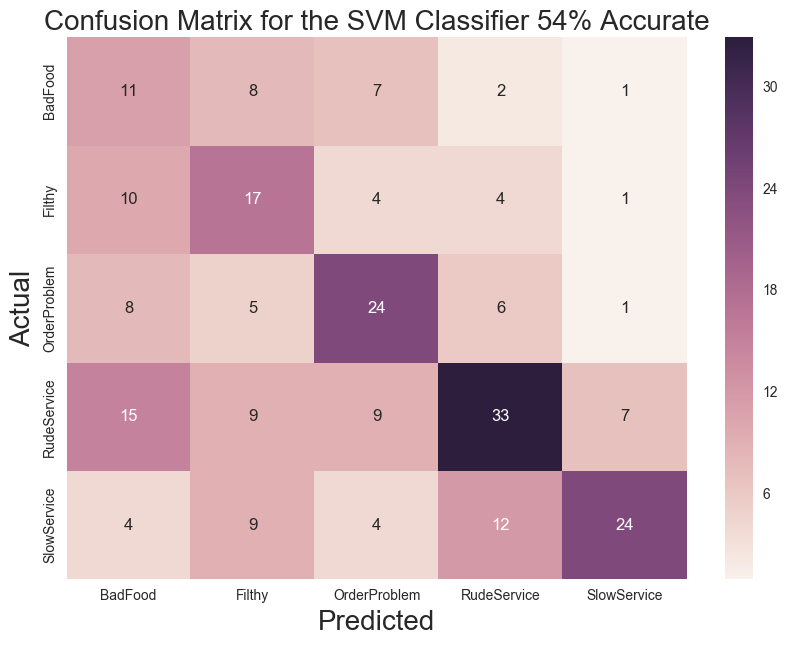

In [69]:

array = cm

final_labels = ['BadFood', 'Filthy', 'OrderProblem', 'RudeService', 'SlowService']
df_cm = pd.DataFrame(array, index = [i for i in final_labels],
                  columns = [i for i in final_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix for the SVM Classifier 54% Accurate", fontsize = 20)
plt.show()
plt.close()

## 10-fold cross validation: 
We do not use it as it gives the average of accuracies but we instead use the mod of accuracies

In [70]:
n_manual = len(data)

def list_model_accur(epoch, model):
    if model == "naive":
        classifier = nltk.NaiveBayesClassifier
    if model == "svm":
        classifier = SklearnClassifier(NuSVC())#LinearSVC
    ls = []
    for i in range(epoch):
        random.shuffle(data)
        train_manual_data = data[:int(round(.8*n_manual))]
        test_manual_data = data[int(round(.8*n_manual)):]
        our_model = classifier.train(train_manual_data)
        ls.append( nltk.classify.accuracy(our_model, test_manual_data) )
    return ls


In [86]:
niave_bayes_acc = list_model_accur(10, "naive")

The Naive Bayes gives these accuracies:  [0.4851063829787234, 0.4978723404255319, 0.4425531914893617, 0.4851063829787234, 0.48936170212765956, 0.4978723404255319, 0.502127659574468, 0.4127659574468085, 0.40425531914893614, 0.48936170212765956]


In [88]:
print("The Naive Bayes gives these accuracies: \n", niave_bayes_acc)

The Naive Bayes gives these accuracies: 
 [0.4851063829787234, 0.4978723404255319, 0.4425531914893617, 0.4851063829787234, 0.48936170212765956, 0.4978723404255319, 0.502127659574468, 0.4127659574468085, 0.40425531914893614, 0.48936170212765956]


In [87]:
np.median(niave_bayes_acc)

0.48723404255319147

In [78]:
svm_acc = list_model_accur(10, "svm")
print("The SVM gives these accuracies: \n", svm_acc)

The SVM gives these accuracies:  [0.5574468085106383, 0.5404255319148936, 0.4765957446808511, 0.502127659574468, 0.5148936170212766, 0.548936170212766, 0.5361702127659574, 0.5361702127659574, 0.5234042553191489, 0.5787234042553191]


In [84]:
np.median(svm_acc)

0.53148936170212768

# Classification by Keras

In [74]:
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import optimizers

Using TensorFlow backend.


In [75]:

print('Loading data...')

dataset = np.loadtxt("csv_data.csv", delimiter=",")
target = np.loadtxt("target_data.csv", delimiter=",")
print("Loading data...done")

Loading data...
Loading data...done


In [76]:
max_words = len(dataset[0])
print("The maxword is ", max_words)
batch_size = 10
epochs = 60
training_portion = int(round(.8*len(dataset)))
x_train = dataset[:training_portion]
y_train = target[:training_portion]
                       
x_test = dataset[training_portion:]
y_test = target[training_portion:]

print(len(x_train), 'train reviews')
print(len(x_test), 'test reviews')

num_classes = len(y_test[0])
print("The number of classes : ", num_classes, 'classes')
print ("The dimension of dataset is ", dataset.shape)
print ("The dimension of target data is ", target.shape)

print ("The dimension of train data is ", x_train.shape)
print ("The dimension of test data is ", x_test.shape)


The maxword is  690
941 train reviews
235 test reviews
The number of classes :  5 classes
The dimension of dataset is  (1176, 690)
The dimension of target data is  (1176, 5)
The dimension of train data is  (941, 690)
The dimension of test data is  (235, 690)


In [77]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Building model...')
model = Sequential()


model.add(Dense(580, input_shape=(max_words,)))
model.add(Dense(400, input_shape=(580,)))
model.add(Dense(280, input_shape=(400,)))
model.add(Dense(150, input_shape=(280,)))
model.add(Dense(95, input_shape=(150,)))
model.add(Dense(50, input_shape=(95,)))
model.add(Dense(35, input_shape=(50,)))
model.add(Dense(15, input_shape=(35,)))


model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, 
             metrics=['accuracy'])
'''
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
'''


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

x_train shape: (941, 690)
x_test shape: (235, 690)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (941, 5)
y_test shape: (235, 5)
Building model...
Train on 846 samples, validate on 95 samples
Epoch 1/60
846/846 [==============================] - 4s 5ms/step - loss: 0.1623 - acc: 0.2258 - val_loss: 0.1553 - val_acc: 0.2421
Epoch 2/60
846/846 [==============================] - 2s 2ms/step - loss: 0.1513 - acc: 0.3582 - val_loss: 0.1510 - val_acc: 0.2737
Epoch 3/60
846/846 [==============================] - 1s 2ms/step - loss: 0.1457 - acc: 0.3889 - val_loss: 0.1486 - val_acc: 0.3474
Epoch 4/60
846/846 [==============================] - 1s 2ms/step - loss: 0.1398 - acc: 0.4362 - val_loss: 0.1452 - val_acc: 0.3789
Epoch 5/60
846/846 [==============================] - 2s 2ms/step - loss: 0.1315 - acc: 0.4645 - val_loss: 0.1408 - val_acc: 0.4211
Epoch 6/60
846/846 [==============================] - 1s 2ms/step - loss: 0.1212 - acc: 0.5390 

### Other architectures:

In [ ]:
'''
model.add(Dense(450, input_shape=(max_words,)))
model.add(Dense(230, input_shape=(450,)))
model.add(Dense(95, input_shape=(230,)))
model.add(Dense(50, input_shape=(95,)))
model.add(Dense(35, input_shape=(50,)))
model.add(Dense(15, input_shape=(35,)))
'''

"""
model.add(Dense(300, input_shape=(max_words,)))
model.add(Dense(130, input_shape=(1000,)))
model.add(Dense(35, input_shape=(600,)))
model.add(Dense(15, input_shape=(350,)))
"""

"""
model.add(Dense(350, input_shape=(600,)))
model.add(Dense(180, input_shape=(350,)))
model.add(Dense(75, input_shape=(180,)))
model.add(Dense(20, input_shape=(75,)))
model.add(Dense(10, input_shape=(20,)))
"""

## How Does TextBlob NaiveBayes Classifier Perform?

In [78]:
n = len(paired)
train = paired[:int(round(.8*n))]
test = paired[int(round(.8*n)):]

In [79]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

## Accuracy of TextBlob Classifier (For Baseline Purposes)

In [80]:
cl.accuracy(test)

0.35319148936170214